1. Implement DFS and BFS in a graph, print the path till the target node
2. Implement DFS and BFS for disconected graph
3. Implement hill climbing for travelling salesman problem

In [54]:
import numpy as np
listOfVisitedNodes=[]
arr = np.array([[0,1,1,0],[0,0,1,0],[1,0,0,1],[0,0,0,1]])
start=2
index=int(arr.size/2)
listOfVisitedNodes.append(start)

                    
for i in listOfVisitedNodes:
    for j in range(4):
        if(arr[i][j]==1 and listOfVisitedNodes.count(j)==0):
            listOfVisitedNodes.append(j)

print("BFS")
for i in listOfVisitedNodes:
    print(i)


BFS
2
0
3
1


In [55]:
listOfVisitedNodes=[]
arr = np.array([[0,1,1,0],[0,0,1,0],[1,0,0,1],[0,0,0,1]])
start=2
index=int(arr.size/2)
listOfVisitedNodes.append(start)
visited = [False] * 5
visited[start]=True
print("DFS")
# print(visited)
while listOfVisitedNodes: 
    t=len(listOfVisitedNodes)
    # print("t=",t) 
    index=listOfVisitedNodes[t-1]
    print(listOfVisitedNodes[t-1])
    element=listOfVisitedNodes.pop(t-1)
    for j in range(4):
        if(arr[index][j]==1 and listOfVisitedNodes.count(j)==0 and visited[j]!=True):
            listOfVisitedNodes.append(j)
            visited[j]=True


DFS
2
3
0
1


In [76]:
import numpy as np
listOfVisitedNodes=[]
arr = np.array([[0,0,1,0],[0,0,0,1],[1,0,0,0],[0,1,0,1]])
start=2
index=int(arr.size/2)
listOfVisitedNodes.append(start)
visited = [False] * 4
visited[start]=True

while(visited.count(False)!=0):
    for i in listOfVisitedNodes:
        for j in range(4):
            if(arr[i][j]==1 and listOfVisitedNodes.count(j)==0):
                listOfVisitedNodes.append(j)
                visited[j]=True
    index=0
    for i in visited:  # type: ignore
        # print(i,index)
        if(i!=True):
            listOfVisitedNodes.append(index)
            visited[index]=True
            # print("added=",index)
            break
        index=index+1


print("BFS")
for i in listOfVisitedNodes:
    print(i)

BFS
2
0
1
3


In [77]:
listOfVisitedNodes=[]
arr = np.array([[0,0,1,0],[0,0,0,1],[1,0,0,0],[0,1,0,1]])

start=2
index=int(arr.size/2)
listOfVisitedNodes.append(start)
visited = [False] * 4
visited[start]=True
print("DFS")
# print(visited)

while(visited.count(False)!=0):
    while listOfVisitedNodes: 
        t=len(listOfVisitedNodes)
        # print("t=",t) 
        index=listOfVisitedNodes[t-1]
        print(listOfVisitedNodes[t-1])
        element=listOfVisitedNodes.pop(t-1)
        for j in range(4):
            if(arr[index][j]==1 and listOfVisitedNodes.count(j)==0 and visited[j]!=True):
                listOfVisitedNodes.append(j)
                visited[j]=True
    index=0
    for i in visited:  # type: ignore
        # print(i,index)
        if(i!=True):
            listOfVisitedNodes.append(index)
            visited[index]=True
            # print("added=",index)
            break
        index=index+1

DFS
2
0
1
3


The solution is 
 [5, 0, 6, 9, 10, 14, 8, 1, 11, 2, 13, 12, 4, 3, 7] 
The path length is 
 283.8355158499078


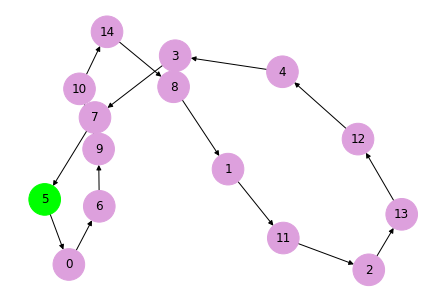

In [60]:

import random
import numpy as np
import networkx as nx

#coordinate of the points/cities
coordinate = np.array([[1,2], [30,21], [56,23], [8,18], [20,50], [3,4], [11,6], [6,7], 
                       [15,20], [10,9], [12,12], [46,17], [60,55], [100,80], [16,13]])

#adjacency matrix for a weighted graph based on the given coordinates
def generate_matrix(coordinate):
    matrix = []
    for i in range(len(coordinate)):
        for j in range(len(coordinate)) :       
            p = np.linalg.norm(coordinate[i] - coordinate[j])
            matrix.append(p)
    matrix = np.reshape(matrix, (len(coordinate),len(coordinate)))
    #print(matrix)
    return matrix

#finds a random solution    
def solution(matrix):
    points = list(range(0, len(matrix)))
    solution = []
    for i in range(0, len(matrix)):
        random_point = points[random.randint(0, len(points) - 1)]
        solution.append(random_point)
        points.remove(random_point)

    return solution


#computes the path based on the random solution
def path_length(matrix, solution):
    cycle_length = 0
    for i in range(0, len(solution)):
        cycle_length += matrix[solution[i]][solution[i - 1]]
    return cycle_length

#generate neighbors of the random solution by swapping cities and returns the best neighbor
def neighbors(matrix, solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbor = solution.copy()
            neighbor[i] = solution[j]
            neighbor[j] = solution[i]
            neighbors.append(neighbor)
            
    #assume that the first neighbor in the list is the best neighbor      
    best_neighbor = neighbors[0]
    best_path = path_length(matrix, best_neighbor)
    
    #check if there is a better neighbor
    for neighbor in neighbors:
        current_path = path_length(matrix, neighbor)
        if current_path < best_path:
            best_path = current_path
            best_neighbor = neighbor
    return best_neighbor, best_path


def hill_climbing(coordinate):
    matrix = generate_matrix(coordinate)
    
    current_solution = solution(matrix)
    current_path = path_length(matrix, current_solution)
    neighbor = neighbors(matrix,current_solution)[0]
    best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

    while best_neighbor_path < current_path:
        current_solution = best_neighbor
        current_path = best_neighbor_path
        neighbor = neighbors(matrix, current_solution)[0]
        best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

    return current_path, current_solution


def graph(coordinate):
    final_solution = hill_climbing(coordinate)
    G = nx.DiGraph()
    temp = final_solution[1]
    G.add_nodes_from(final_solution[1])
    
    for i in range(1, len(final_solution[1])):
        G.add_edge(temp[i - 1], temp[i])
    G.add_edge(temp[len(temp) - 1], temp[0])
    color_map = []
    for node in G:
        if node == final_solution[1][0]:
            color_map.append('lime')
        else: 
            color_map.append('plum')
    nx.draw(G, with_labels = True, node_color = color_map, node_size = 1000)
    print("The solution is \n", final_solution[1], "\nThe path length is \n", final_solution[0])
    return

    
graph(coordinate)